##**Objectif du TP**
 L’objectif de ce Travail Pratique est de permettre à l’étudiant de :

 1. Comprendre et appliquer les concepts fondamentaux des Réseaux de Neurones Convolutionnels (CNN) pour traiter des
données visuelles.
 2. Concevoir, entraîner et évaluer un modèle CNN sur une tâche :

   • de classification (ex : homme / femme / enfant),

   • ou de régression (ex : prédiction de l’âge à partir d’une image).

 3. Maîtriser les différentes étapes d’un pipeline Deep Learning :

 ✓ Préparation et chargement du dataset,

 ✓ Pré-traitement et augmentation des images,

 ✓ Construction d’un CNN,

 ✓ Entraînement, validation et test,

 ✓ Analyse et interprétation des performances (accuracy, loss, MAE, MSE…).

 4. Comparer les résultats obtenus avec différentes architectures, hyperparamètres et stratégies d’optimisation.

 5. Comprendre pourquoi les CNN sont adaptés aux problèmes d'analyse d’images.

6. Utiliser des frameworks modernes de Deep Learning pour construire et entraîner les modèles :

   • TensorFlow / Keras : bibliothèque open-source permettant de définir, entraîner et déployer facilement des réseaux de neurones, avec  un pipeline de données optimisé et des outils intégrés pour le calcul sur GPU.

  • PyTorch : alternative populaire à TensorFlow, très flexible et intuitive pour la recherche et le prototypage de modèles.
 ( Dans notre TP on va travailler avec TensorFlow )

 • Pourquoi CNN pour la classification / régression d’images ?
 Les CNN sont utilisés car ils imitent la manière dont le cerveau humain traite les images :

 ✔ Extraction automatique des caractéristiques
 Pas besoin de faire du feature engineering manuel (comme en ML traditionnel).
 Les convolutions apprennent automatiquement :
 bords, textures, motifs,, formes complexes (yeux, visage…).

 ✔ Partage des poids (weight sharing)
 Chaque filtre apprend un motif qui se répète partout dans l’image → modèle plus rapide, moins de paramètres.

 ✔ Invariance aux translations
 Le modèle reconnaît un visage ou un objet même :
 déplacé, zoomé, légèrement déformé, partiellement visible.

 ✔ Adaptés à la structure spatiale des images
 Contrairement aux méthodes classiques (SVM, KNN…), les CNN exploitent :
 la proximité des pixels, les relations locales, la hiérarchie des formes.

 ✔ Performance très élevée sur les tâches vision
 Aujourd’hui, les CNN sont la norme pour :
 classification d’images, détection, segmentation, reconnaissance faciale, prédiction continue (âge, landmarks…).


##Exemple 1 — Classification MNIST (Chiffres manuscrits)

1) Importation + Chargement du dataset

🔍 Interprétation
Avant d’entraîner un CNN, les données doivent être :

chargées depuis la base MNIST,

séparées en train/test pour mesurer la généralisation,

normalisées entre 0 et 1 pour faciliter la convergence du gradient.

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [ ]:
# Chargement MNIST
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
# Normalisation
x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
# Redimensionner (Conv2D attend des images 28×28×1)
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

print("Shape:", x_train.shape, y_train.shape)

Shape: (60000, 28, 28, 1) (60000,)


2) Visualisation

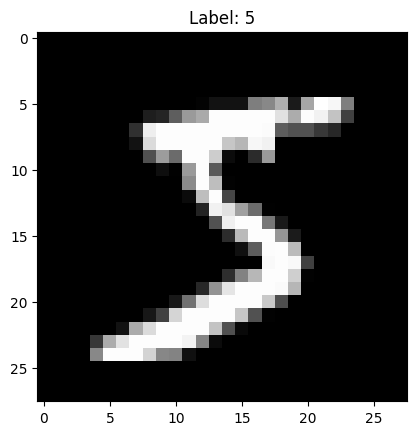

In [ ]:
plt.imshow(x_train[0].squeeze(), cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.show()


🔍 Interprétation

Visualiser les images permet de vérifier que :

le chargement est correct,

le format est cohérent (28×28),

les classes correspondent bien aux images.

3) Construction du CNN

In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

#• Entrainement
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

🔍 Interprétation

Un CNN apprend automatiquement les caractéristiques visuelles :

1ère couche : bords

2e couche : motifs

couches profondes : formes complexes

Le modèle ci-dessus est simple mais très efficace.

4) Entraînement

In [ ]:
history = model.fit(
    x_train, y_train,
    epochs=5,
    validation_split=0.2
)


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8919 - loss: 0.3556 - val_accuracy: 0.9829 - val_loss: 0.0587
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9845 - loss: 0.0496 - val_accuracy: 0.9835 - val_loss: 0.0519
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9902 - loss: 0.0334 - val_accuracy: 0.9792 - val_loss: 0.0750
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9929 - loss: 0.0232 - val_accuracy: 0.9885 - val_loss: 0.0378
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9960 - loss: 0.0130 - val_accuracy: 0.9906 - val_loss: 0.0382


🔍 Interprétation
Le modèle ajuste ses poids pour minimiser la loss.
Une validation 10% permet de vérifier que le modèle ne sur-apprend pas.

5) Courbes d’apprentissage

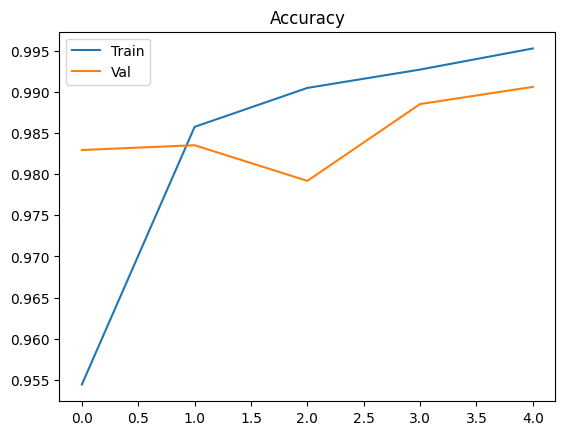

In [ ]:
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Val')
plt.legend()
plt.title("Accuracy")
plt.show()


🔍 Interprétation

Ces courbes permettent de vérifier :

si le modèle apprend réellement

s’il sur-apprend (train ↑ mais val ↓)

si le nombre d’époques est suffisant

6) Évaluation

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Accuracy Test:", test_acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9878 - loss: 0.0373
Accuracy Test: 0.9908000230789185


🔍 Interprétation

Un bon modèle doit obtenir une accuracy test proche de la validation.

7) Prédiction

🔍 Interprétation
Cette étape permet de vérifier qualitativement la reconnaissance d’un chiffre.

In [ ]:
import numpy as np

img = x_test[0]
pred = model.predict(img[None, ...])
print("Pred:", np.argmax(pred))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step
Pred: 7


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step


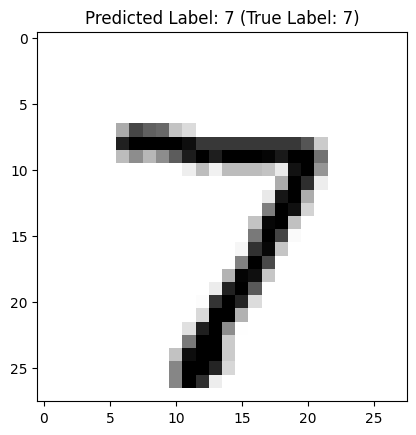

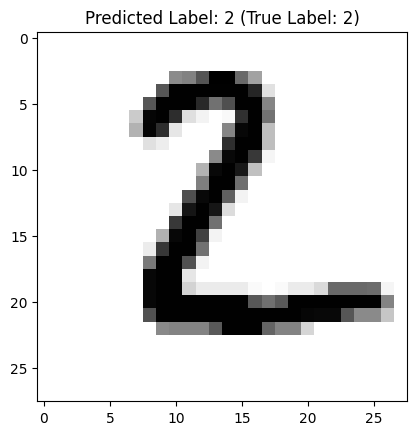

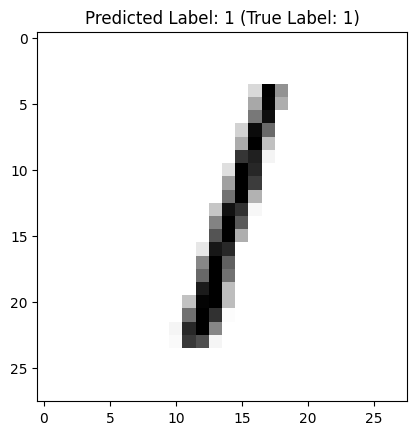

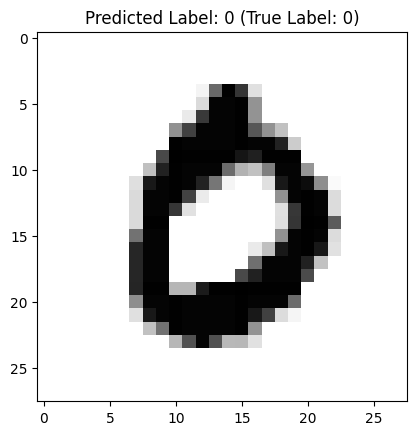

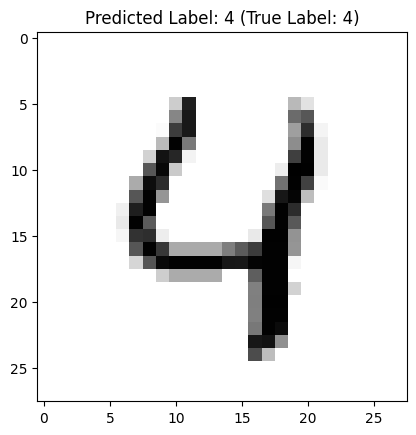

In [ ]:
import matplotlib.pyplot as plt
# Prédiction sur plusieurs images du dataset de test
num_images = 5 # Le nombre d'images à tester
predictions = model.predict(x_test[:num_images])
# Affichage des images et de leurs prédictions
for i in range(num_images):
    plt.imshow(x_test[i].reshape((28, 28)), cmap=plt.cm.binary)
    plt.title(f"Predicted Label: {np.argmax(predictions[i])} (True Label: {y_test[i]})")
    plt.show()

##🌸 Exemple 2 — Classification des Fleurs

1) Chargement du dataset TensorFlow

Importation des lirairies

🔍 Interprétation
Charger le dataset avec image_dataset_from_directory permet de gérer automatiquement :

labels

batchs

mélange

normalisation partiell

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.19.0


Chargement du dataset

In [ ]:
(ds_train, ds_test), ds_info = tfds.load(
    "tf_flowers",
    split=["train[:80%]", "train[80%:]"], # 80% train, 20% test
    as_supervised=True,
    with_info=True
)
class_names = ds_info.features["label"].names
print("Classes", class_names)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/tf_flowers/incomplete.Q7LLAM_3.0.1/tf_flowers-train.tfrecord*...:   0%|   …

Dataset tf_flowers downloaded and prepared to /root/tensorflow_datasets/tf_flowers/3.0.1. Subsequent calls will reuse this data.
Classes ['dandelion', 'daisy', 'tulips', 'sunflowers', 'roses']


• Visualisation des images du Dataset

🔍 Interprétation
Permet de vérifier la distribution du dataset et la cohérence des classes.

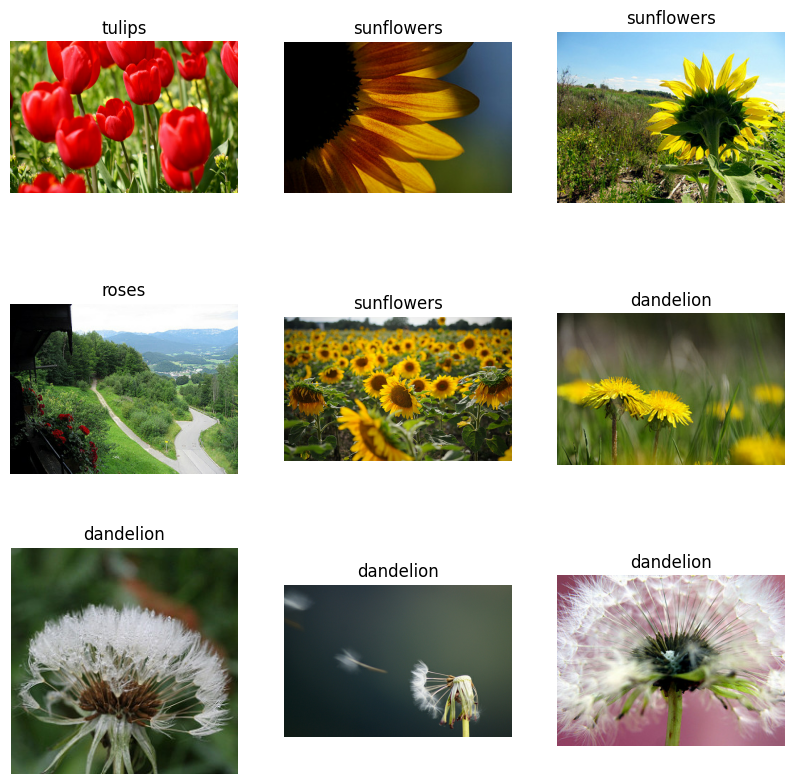

In [ ]:
plt.figure(figsize=(10, 10))
for i, (image, label) in enumerate(ds_train.take(9)):
    ax = plt.subplot(3, 3, i+1)
    plt.imshow(image)
    plt.title(class_names[label])
    plt.axis("off")
plt.show()

Prétraitement du Dataset

In [ ]:
IMG_SIZE = 128
def preprocess (image, label):
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    image = tf.cast(image, tf.float32) / 255.0
    return image, label
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1),
])

In [ ]:
BATCH_SIZE = 32
train_ds = ds_train.map(preprocess).shuffle (1000).batch (BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_ds = ds_test.map(preprocess).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

🔍 Interprétation

L’augmentation augmente artificiellement la taille du dataset et réduit le sur-apprentissage.


## Construction d’un CNN

In [ ]:
model = tf.keras.Sequential ([
data_augmentation,
tf.keras.layers.Conv2D (32, (3,3), activation='relu', padding="same"),
tf.keras.layers.MaxPooling2D(),
tf.keras.layers.Conv2D (64, (3,3), activation='relu', padding="same"),
tf.keras.layers.MaxPooling2D(),
tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding="same"),
tf.keras.layers.MaxPooling2D(),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense (128, activation='relu'),
tf.keras.layers.Dropout (0.3),
tf.keras.layers.Dense(5, activation='softmax') #5 classes
])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_1 (Sequential)       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

🔍 Interprétation

Plus les images sont grandes, plus le modèle doit être profond pour capturer les détails.

• Entrainement

🔍 Interprétation

Les courbes montrent si le modèle a appris correctement.

In [ ]:
model.compile(
optimizer="adam",
loss="sparse_categorical_crossentropy",
metrics=["accuracy"]
)
history = model.fit(
train_ds,
validation_data= test_ds,
epochs=15
)

Epoch 1/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 11s 52ms/step - accuracy: 0.3514 - loss: 1.4746 - val_accuracy: 0.5708 - val_loss: 1.0659
Epoch 2/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.5396 - loss: 1.1321 - val_accuracy: 0.6104 - val_loss: 0.9687
Epoch 3/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.5983 - loss: 1.0069 - val_accuracy: 0.6894 - val_loss: 0.8334
Epoch 4/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.6547 - loss: 0.8811 - val_accuracy: 0.6907 - val_loss: 0.8127
Epoch 5/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.6856 - loss: 0.8372 - val_accuracy: 0.7044 - val_loss: 0.7692
Epoch 6/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.7051 - loss: 0.7498 - val_accuracy: 0.6839 - val_loss: 0.7693
Epoch 7/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.7224 - loss: 0.7088 - val_accuracy: 0.7098 - val_loss: 0.7658
Epoch 8/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.7420 - loss: 0.6719 - val_accuracy: 0.7493 - 

Courbes d’apprentissage

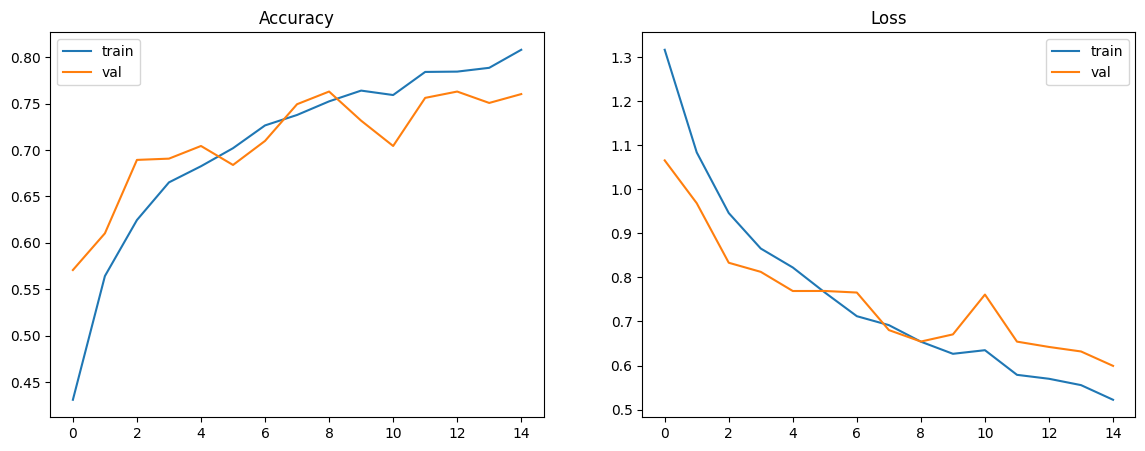

In [ ]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.plot(history.history["accuracy"], label="train")
plt.plot(history.history["val_accuracy"], label="val")
plt.title("Accuracy")
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history["loss"], label="train")
plt.plot(history.history["val_loss"], label="val")
plt.title("Loss")
plt.legend()
plt.show()

• Evaluation

In [ ]:
test_loss, test_acc = model.evaluate(test_ds)
print("Accuracy test", test_acc)

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7635 - loss: 0.6433
Accuracy test 0.7602179646492004


• Affichage de 10 images du test avec classe réelle & prédite

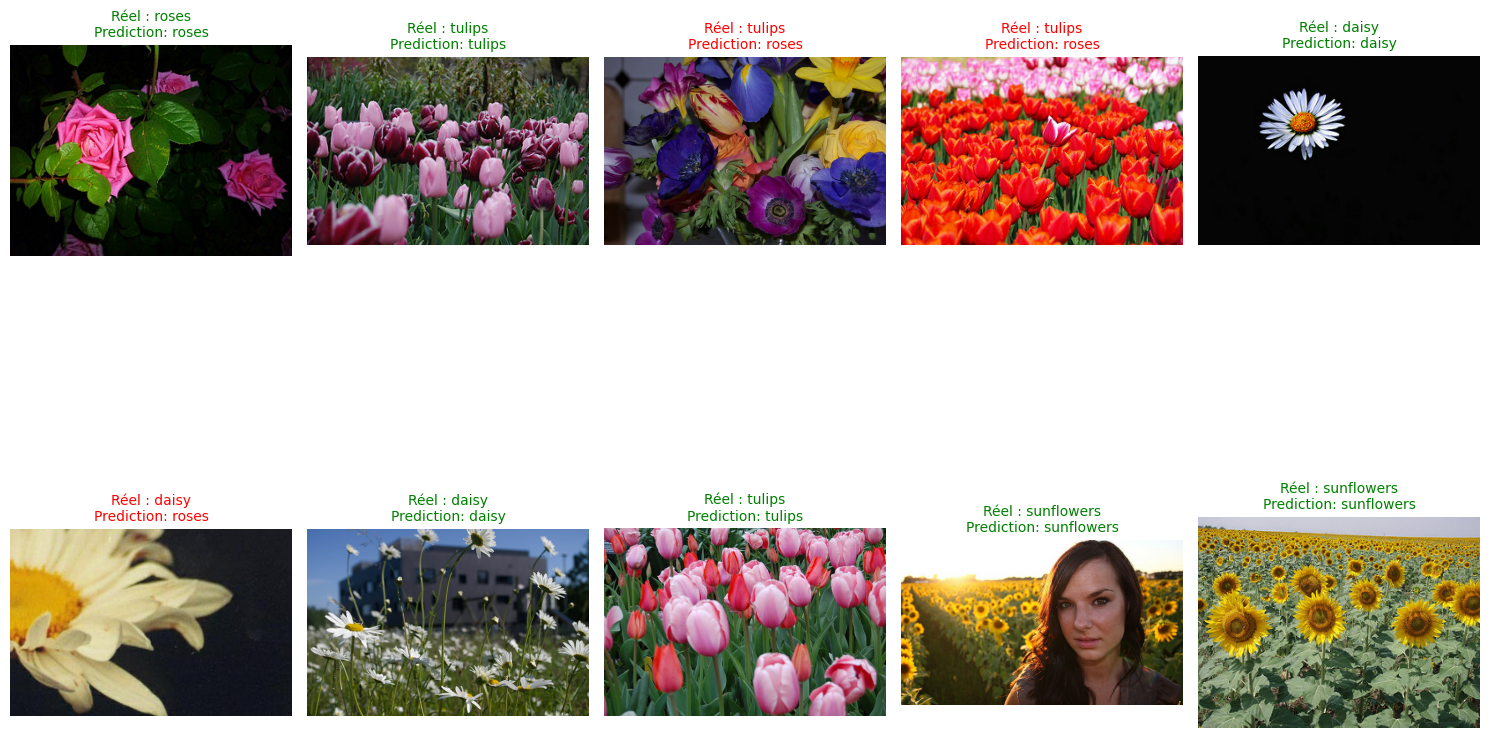

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
#On va prendre 10 images du test set
num_images = 10
plt.figure(figsize=(15, 12))
for i, (image, label) in enumerate(ds_test.take(num_images)):
#prétraitement de l'image pour la prédiction
  img_resized = tf.image.resize(image, (IMG_SIZE, IMG_SIZE)) / 255.0
  prediction = model.predict(tf.expand_dims(img_resized, axis=0), verbose=0)
  pred_label= np.argmax(prediction)

  #Affichage
  plt.subplot(2, 5, i + 1)
  plt.imshow(image)
  plt.axis("off")
  plt.title(
      f"Réel : {class_names[label]}\n"
      f"Prediction: {class_names[pred_label]}",
      color = "green" if pred_label == label else "red",
      fontsize = 10
  )
plt.tight_layout()
plt.show()


• Sauvegarde du modèle

In [ ]:
model.save("cnn_flowers.h5")
print("Modèle sauvegarde !")

Modèle sauvegarde !


##🐶 Exemple 3 — Classification Chat vs Chien (Binary)

1) Chargement du dataset

Importation des librairies + Chargement du Dataset




🔍 Interprétation

Cette étape charge les images organisées en deux dossiers (“cats” et "dogs").
image_dataset_from_directory crée automatiquement :

les labels (0 : chat, 1 : chien),

les batches,

le mélange des données.

Cela simplifie énormément la préparation du dataset.

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
(ds_train, ds_test), ds_info = tfds.load(
"cats_vs_dogs",
split=["train[:88%]", "train[80%:]"],
as_supervised=True,
with_info=True
)
class_names = ["Cat", "Dog"]
ds_info

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/incomplete.QKQ7IX_4.0.1/cats_vs_dogs-train.tfrecord*...:   0%…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.1. Subsequent calls will reuse this data.


tfds.core.DatasetInfo(
    name='cats_vs_dogs',
    full_name='cats_vs_dogs/4.0.1',
    description="""
    A large set of images of cats and dogs. There are 1738 corrupted images that are dropped.
    """,
    homepage='https://www.microsoft.com/en-us/download/details.aspx?id=54765',
    data_dir='/root/tensorflow_datasets/cats_vs_dogs/4.0.1',
    file_format=tfrecord,
    download_size=786.67 MiB,
    dataset_size=1.04 GiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'image/filename': Text(shape=(), dtype=string),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    nondeterministic_order=False,
    splits={
        'train': <SplitInfo num_examples=23262, num_shards=16>,
    },
    citation="""@Inproceedings (Conference){asirra-a-captcha-that-exploits-interest-aligned-manual-image-categorization,
    author = {Elson, Jeremy and Douceur, Jo

• Visualisation des images du Dataset

🔍 Interprétation

On vérifie que les images sont bien chargées et que les labels correspondent à la classe affichée.
Cela permet d’éviter des erreurs de prétraitement.

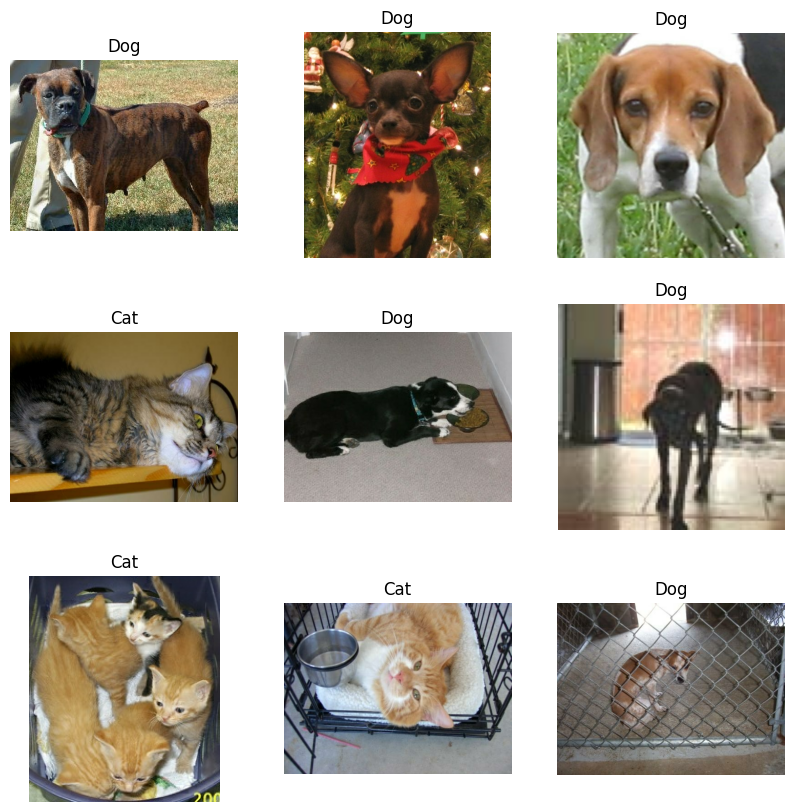

In [ ]:
plt.figure(figsize=(10, 10))
for i, (img, label) in enumerate(ds_train.take(9)):
    ax = plt.subplot(3, 3, i+1)
    plt.imshow(img)
    plt.title(class_names [label])
    plt.axis("off")
plt.show()

• Prétraitement des données + Data_Augmentation

🔍 Interprétation

L’augmentation des données permet de rendre le modèle plus robuste en simulant :

miroir horizontal

zoom

légères déformations

Cela réduit fortement le sur-apprentissage.

In [ ]:
IMG_SIZE = 128
def preprocess(image, label):
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

In [ ]:
data_augmentation = tf.keras.Sequential ([
tf.keras.layers.RandomFlip("horizontal"),
tf.keras.layers.RandomRotation(0.1),
tf.keras.layers.RandomZoom (0.1)
])

In [ ]:
BATCH_SIZE = 32
train_ds = ds_train.map(preprocess).shuffle(1000).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_ds = ds_test.map(preprocess).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

• Construction du modèle

In [ ]:
model = tf.keras. Sequential([
    data_augmentation,
    tf.keras.layers.Conv2D (32, (3,3), activation= 'relu', padding='same'),
    tf.keras.layers. MaxPooling2D(),
    tf.keras.layers.Conv2D (64, (3,3), activation ='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(128, (3,3), activation ='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers. Dense (128, activation ='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers. Dense (1, activation='sigmoid') #Binaire
])
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_3 (Sequential)       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

• Entrainement

🔍 Interprétation

Le modèle suit une architecture classique en vision :

plusieurs blocs Convolution + MaxPooling

flatten

dense

sortie sigmoid pour classification binaire

Plus les couches sont profondes, plus le modèle peut détecter des motifs complexes (yeux, museau…).

In [ ]:
model.compile(
    optimizer ="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)
history= model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=10
)

Epoch 1/10
640/640 ━━━━━━━━━━━━━━━━━━━━ 33s 47ms/step - accuracy: 0.5585 - loss: 0.6807 - val_accuracy: 0.7130 - val_loss: 0.5537
Epoch 2/10
640/640 ━━━━━━━━━━━━━━━━━━━━ 36s 55ms/step - accuracy: 0.6927 - loss: 0.5796 - val_accuracy: 0.7528 - val_loss: 0.5158
Epoch 3/10
640/640 ━━━━━━━━━━━━━━━━━━━━ 31s 47ms/step - accuracy: 0.7471 - loss: 0.5208 - val_accuracy: 0.7928 - val_loss: 0.4466
Epoch 4/10
640/640 ━━━━━━━━━━━━━━━━━━━━ 30s 46ms/step - accuracy: 0.7725 - loss: 0.4836 - val_accuracy: 0.8014 - val_loss: 0.4341
Epoch 5/10
640/640 ━━━━━━━━━━━━━━━━━━━━ 37s 57ms/step - accuracy: 0.7902 - loss: 0.4549 - val_accuracy: 0.7926 - val_loss: 0.4508
Epoch 6/10
640/640 ━━━━━━━━━━━━━━━━━━━━ 36s 55ms/step - accuracy: 0.8051 - loss: 0.4294 - val_accuracy: 0.8014 - val_loss: 0.4304
Epoch 7/10
640/640 ━━━━━━━━━━━━━━━━━━━━ 31s 48ms/step - accuracy: 0.8251 - loss: 0.3983 - val_accuracy: 0.8495 - val_loss: 0.3487
Epoch 8/10
640/640 ━━━━━━━━━━━━━━━━━━━━ 31s 46ms/step - accuracy: 0.8316 - loss: 0.3815 - 

.  Courbes d’apprentissage

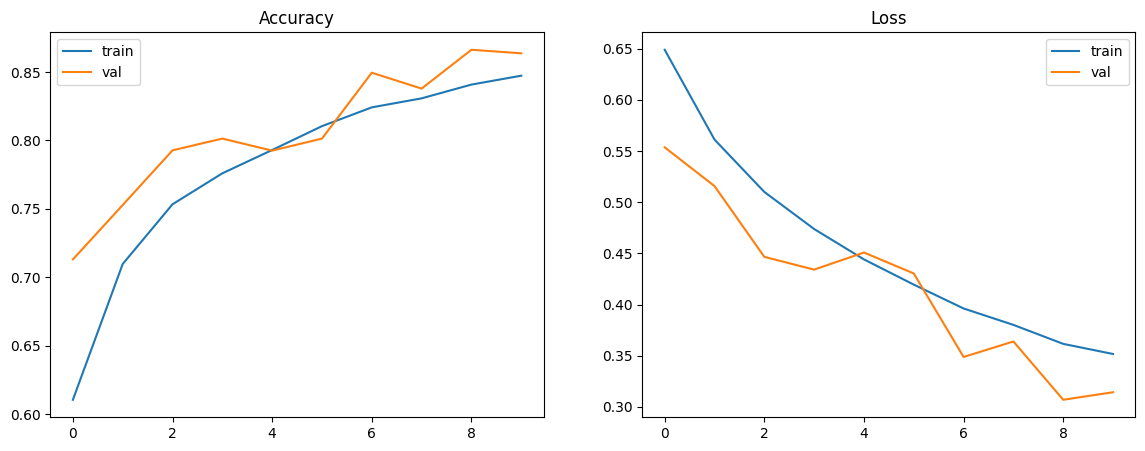

In [ ]:
plt.figure(figsize = (14,5))

#ACCURACY
plt.subplot(1,2,1)
plt.plot(history.history["accuracy"], label="train")
plt.plot(history.history["val_accuracy"], label="val")
plt.title("Accuracy")
plt.legend()

#LOSS
plt.subplot(1,2,2)
plt.plot(history.history["loss"], label="train")
plt.plot(history.history["val_loss"], label="val")
plt.title("Loss")
plt.legend()
plt.show()

• Evaluation

In [ ]:
test_loss, test_acc = model.evaluate(test_ds)
print("Test accuracy", test_acc)

146/146 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.8730 - loss: 0.3050
Test accuracy 0.8637145161628723


• Evaluation

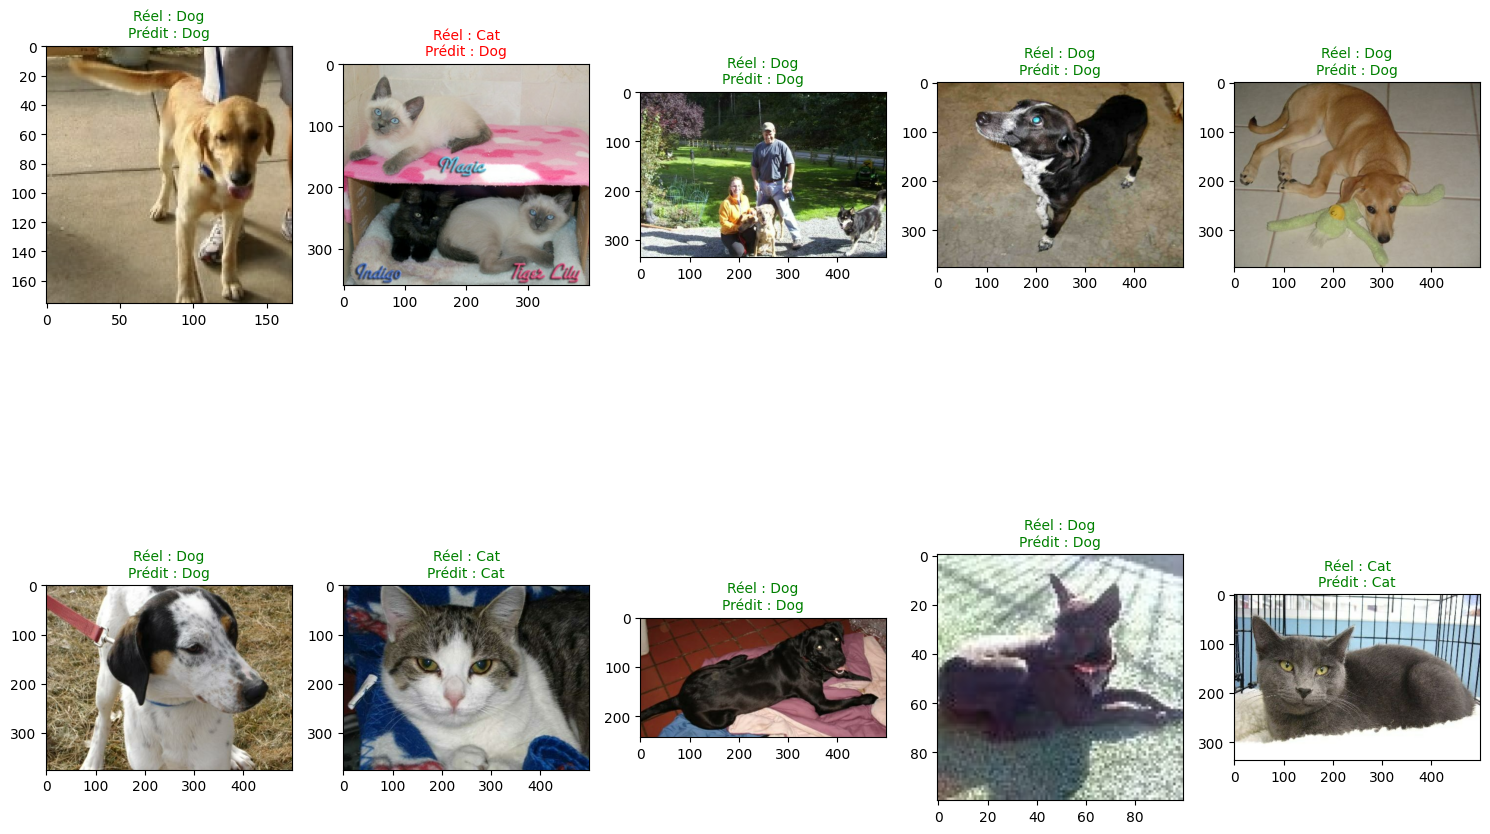

In [ ]:
plt.figure(figsize=(15, 12))
num_images = 10
for i, (image, label) in enumerate(ds_test.take(num_images)):
    img_resized = tf.image.resize(image, (IMG_SIZE, IMG_SIZE)) / 255.0
    pred = model.predict(tf.expand_dims(img_resized, axis=0), verbose=0)
    pred_label = 1 if pred > 0.5 else 0
    plt.subplot(2, 5, i + 1)
    plt.imshow(image)
    color = "green" if pred_label == label else "red"
    plt.title(
        f"Réel : {class_names[label]}\n"
        f"Prédit : {class_names[pred_label]}",
        color = color,
        fontsize = 10
    )
plt.tight_layout()
plt.show()



##Matrice de confusion

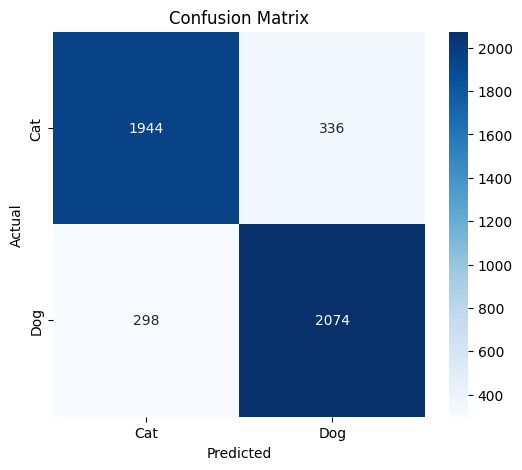

In [ ]:
y_true = []
y_pred = []
for images, labels in test_ds:
    preds = model.predict(images, verbose=0)
    preds = (preds > 0.5).astype("int32") # Corrected threshold
    y_true.extend(labels.numpy())
    y_pred.extend(preds.flatten())
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
xticklabels=class_names,
yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

##**EXEMPLE 4 — Prédiction de l’âge (Régression)**

##📌 Étape 1 — Chargement du Dataset
🔍 Interprétation

Ici, le problème n’est plus une classification mais une régression.
La sortie sera un nombre réel (l’âge).
Les images sont associées à des valeurs numériques dans un CSV.

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!wget -q https://huggingface.co/datasets/py97/UTKFace-Cropped/resolve/main/UTKFace.tar.gz
!tar -xf UTKFace.tar.gz

 Prétraitement

In [3]:
import os
from PIL import Image
IMG_SIZE =128
images = []
ages = []
directory = "UTKFace"
for file in os.listdir(directory):
  try:
      # Récupérer l'âge
      age = int(file.split("_")[0])
      #Charger l'image
      img = Image.open(os.path.join(directory, file))
      img = img.resize((IMG_SIZE, IMG_SIZE))
      img = np.array(img)
      images.append(img)
      ages.append(age)
  except:
      pass # ignorer fichiers corrompus

##• Prétraitement

In [4]:
import numpy as np
images= np.array(images) / 255.0
ages = np.array(ages)
print("Total images:", len(images))

Total images: 23708


In [5]:
import tensorflow as tf
import os

DATASET_DIR="/content/UTKFace"

def parse_image(filename):
    # exemple: "25_0_0_20170116174525125.jpg"
    age = int(filename.split("_")[0])
    filepath = os.path.join(DATASET_DIR, filename)
    img = tf.lo.read_file(filepath)
    img = tf.image.decode_jpeg(img, channels=3)
    img =tf.image.resize(img, (128, 128))
    img =img / 255.0
    return img, tf.cast(age, tf.float32)
#liste des fichiers
files = os.listdir(DATASET_DIR)
#split manuel (sans toucher à la RAM)
train_files = files[:15000]
test_files = files [15000:]

Prétraitement

In [6]:
def parse_image(filename):
    # filename est un tf.Tensor => utiliser tf.strings.split
    parts = tf.strings.split(filename, "_")
    age = tf.strings.to_number(parts[0], out_type=tf.int32)
    filepath = tf.strings.join([DATASET_DIR, "/", filename])
    img = tf.io.read_file(filepath)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, (128, 128))
    img = img / 255.0
    return img, tf.cast(age, tf.float32)

In [7]:
train_ds = tf.data.Dataset.from_tensor_slices (train_files)
train_ds = train_ds.shuffle(15000)
train_ds = train_ds.map(lambda x: parse_image(x), num_parallel_calls=tf.data.AUTOTUNE)
train_ds = train_ds.batch(32).prefetch(tf.data.AUTOTUNE)
test_ds = tf.data.Dataset.from_tensor_slices(test_files)
test_ds = test_ds.map(lambda x: parse_image(x), num_parallel_calls=tf.data.AUTOTUNE)
test_ds = test_ds.batch(32).prefetch(tf.data.AUTOTUNE)

##• Construction du CNN

In [8]:
from tensorflow.keras import layers, models
model = models.Sequential([
    layers.Conv2D(32, 3, activation ='relu', input_shape=(128,128,3)),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, activation ='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, activation ='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers. Dense (128, activation='relu'),
    layers.Dense (1) # régression un seul neurone
])
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,769 (12.61 MB)

 Trainable params: 3,304,769 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

##• Entrainement

In [9]:
model.compile(
    optimizer ="adam",
    loss="mae"
    ,
    metrics=["mse", "mae"]
)
history = model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=10
)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - loss: 15.7881 - mae: 15.7881 - mse: 439.9649 - val_loss: 11.2589 - val_mae: 11.2589 - val_mse: 233.0865
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - loss: 10.7102 - mae: 10.7102 - mse: 215.3606 - val_loss: 9.3292 - val_mae: 9.3292 - val_mse: 174.3065
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - loss: 9.0561 - mae: 9.0561 - mse: 156.0576 - val_loss: 8.7689 - val_mae: 8.7689 - val_mse: 147.1781
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 22s 31ms/step - loss: 8.0675 - mae: 8.0675 - mse: 126.4635 - val_loss: 7.9588 - val_mae: 7.9588 - val_mse: 127.7654
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - loss: 7.5252 - mae: 7.5252 - mse: 109.7372 - val_loss: 7.6749 - val_mae: 7.6749 - val_mse: 113.4202
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - loss: 7.1200 - mae: 7.1200 - mse: 98.8496 - val_loss: 7.5455 - val_mae: 7.5455 - val_mse: 116.7272
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 22s 31ms/step - los

##• Courbes d’apprentissage

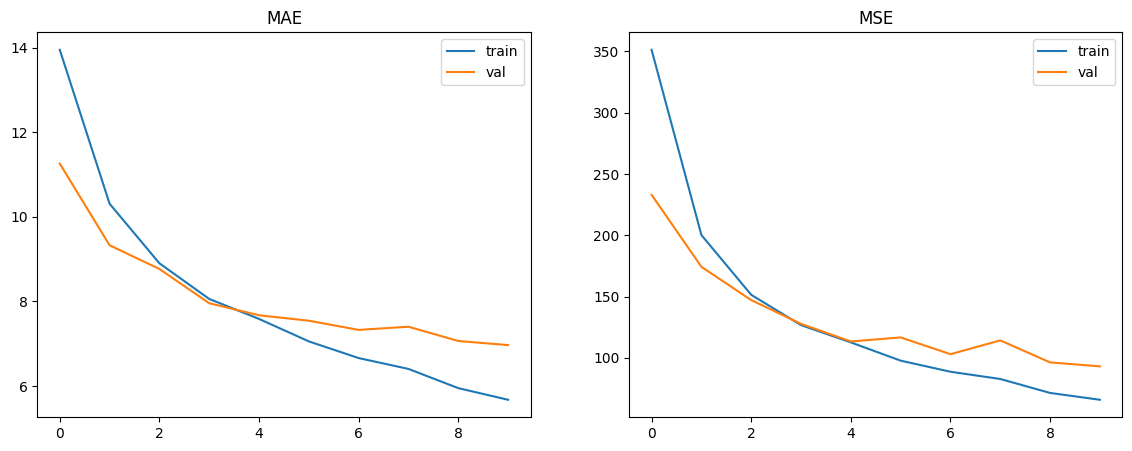

In [10]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.plot(history.history["mae"], label="train")
plt.plot(history.history["val_mae"], label="val")
plt.title("MAE")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history["mse"], label="train")
plt.plot(history.history["val_mse"], label="val")
plt.title("MSE")
plt.legend()
plt.show()

##• Prédiction sur des images de test

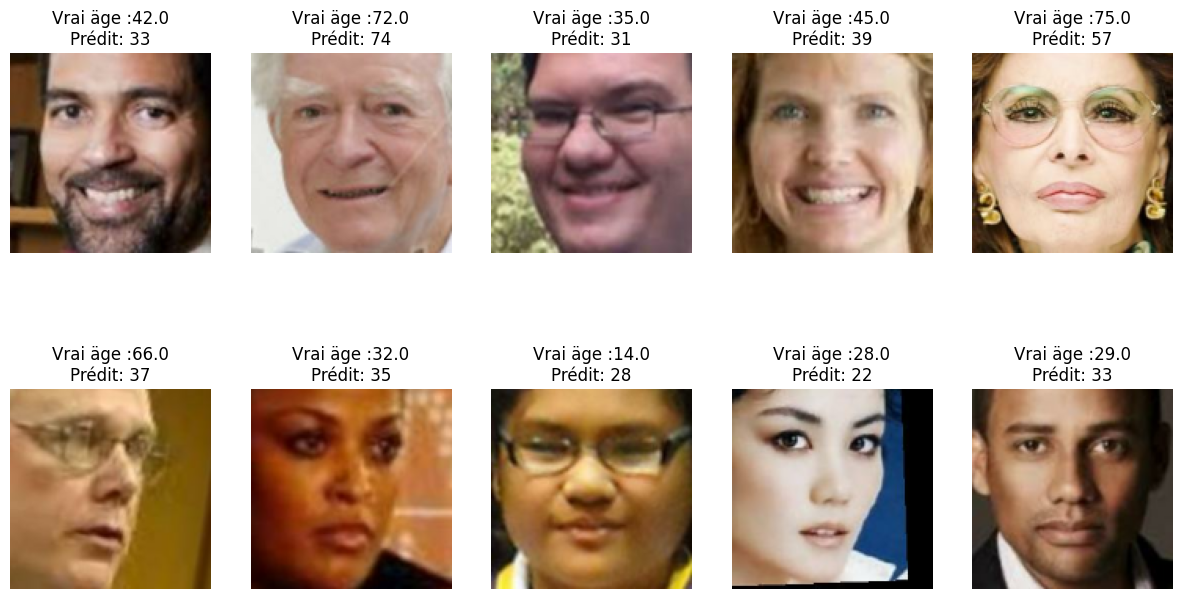

In [15]:
import matplotlib.pyplot as plt
import random

sample_files = random.sample(test_files, 10)

plt.figure(figsize=(15, 8))

for i, fname in enumerate(sample_files):
    img, age = parse_image(fname)
    pred = model.predict(tf.expand_dims(img, 0), verbose=0) [0][0]

    plt.subplot(2, 5, i+1)
    plt.imshow(img)
    plt.title(f"Vrai äge :{age}\nPrédit: {int(pred)}")
    plt.axis("off")

plt.show()




##**EXEMPLE 5 — Classification Homme / Femme / Enfant**

##Importation + chargement

In [16]:
import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt
import random

In [17]:
!wget -q https://huggingface.co/datasets/py97/UTKFace-Cropped/resolve/main/UTKFace.tar.gz
!tar -xf UTKFace.tar.gz

In [37]:
DATASET_DIR="/content/UTKFace"
files = [f for f in os.listdir(DATASET_DIR) if f.endswith(".jpg")]
len(files)

23708

##• Prétraitement

In [38]:
def get_label_age_gender(parts):
    age = tf.strings.to_number(parts[0], out_type=tf.int32)
    gender = tf.strings.to_number(parts[1], out_type=tf.int32)
    # 0 homme adulte, 1 femme adulte, 2 enfant
    if age < 15:
      label = 2
    else:
     label = gender
    return tf.one_hot(label, 3)

In [48]:
IMG_SIZE = 128

def parse_image(filename):
    parts= tf.strings.split(filename, "_") # Fixed: split by underscore, not empty string

    label = get_label_age_gender(parts)
    #3 classes:
    filepath = tf.strings.join([DATASET_DIR, "/", filename])

    img = tf.io.read_file(filepath)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, (IMG_SIZE, IMG_SIZE)) # Corrected typo here
    img = img / 255.0
    return img, label

• Prétraitement

In [49]:
random.shuffle(files)
train_files = files[:18000]
test_files = files [18000:]

In [50]:
train_ds = tf.data.Dataset.from_tensor_slices (train_files)
train_ds = train_ds.shuffle (10000)
train_ds = train_ds.map(parse_image, num_parallel_calls=tf.data.AUTOTUNE)
train_ds =train_ds.batch(32).prefetch(tf.data.AUTOTUNE)

test_ds = tf.data.Dataset.from_tensor_slices(test_files)
test_ds = test_ds.map(parse_image, num_parallel_calls=tf.data.AUTOTUNE)
test_ds = test_ds.batch(32).prefetch(tf.data.AUTOTUNE)

• Construction du CNN

In [51]:
from tensorflow.keras import layers, models
num_classes = 3 #mettre 2 si tu fais homme/femme
model = models.Sequential([
    layers.Conv2D(32, 3, activation='relu', input_shape=(128, 128,3)),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense (128, activation="relu"),
    layers.Dense(num_classes, activation='softmax')
])
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,305,027 (12.61 MB)

 Trainable params: 3,305,027 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

• Entrainement

In [52]:
history = model.fit(
train_ds,
validation_data=test_ds,
epochs=10
)



Epoch 1/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 23s 34ms/step - accuracy: 0.7391 - loss: 0.6488 - val_accuracy: 0.8457 - val_loss: 0.4127
Epoch 2/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 14s 24ms/step - accuracy: 0.8964 - loss: 0.2970 - val_accuracy: 0.9022 - val_loss: 0.2717
Epoch 3/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 14s 24ms/step - accuracy: 0.9155 - loss: 0.2474 - val_accuracy: 0.9136 - val_loss: 0.2540
Epoch 4/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 25s 44ms/step - accuracy: 0.9309 - loss: 0.1988 - val_accuracy: 0.8994 - val_loss: 0.2933
Epoch 5/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 23s 41ms/step - accuracy: 0.9376 - loss: 0.1766 - val_accuracy: 0.9091 - val_loss: 0.2751
Epoch 6/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 25s 44ms/step - accuracy: 0.9540 - loss: 0.1387 - val_accuracy: 0.9240 - val_loss: 0.2408
Epoch 7/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - accuracy: 0.9646 - loss: 0.1085 - val_accuracy: 0.9210 - val_loss: 0.2601
Epoch 8/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 14s 24ms/step - accuracy: 0.9744 - loss: 0.0807 - 

 Evaluation

In [53]:
model.evaluate(test_ds)


179/179 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9125 - loss: 0.3936


[0.3692074418067932, 0.9129292368888855]

**Courbes d’apprentissage**

Text(0.5, 1.0, 'Loss')

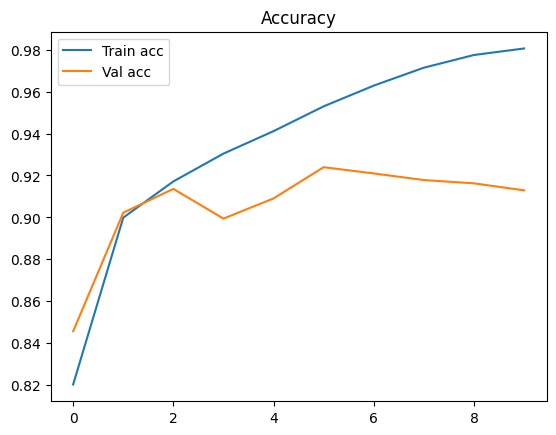

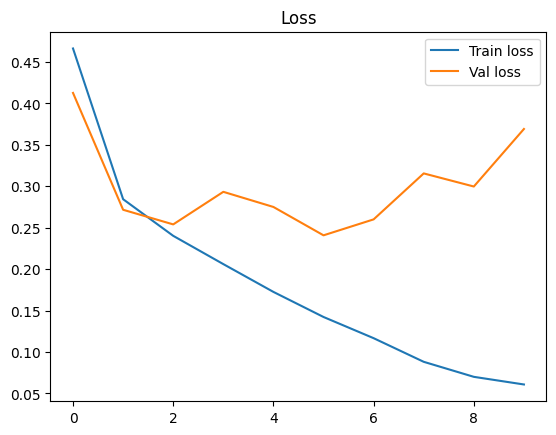

In [54]:
plt.plot(history.history['accuracy'], label='Train acc')
plt.plot(history.history['val_accuracy'], label='Val acc')
plt.legend()
plt.title("Accuracy")

plt.figure()
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Val loss')
plt.legend()
plt.title("Loss")

##Prédiction sur des images de test

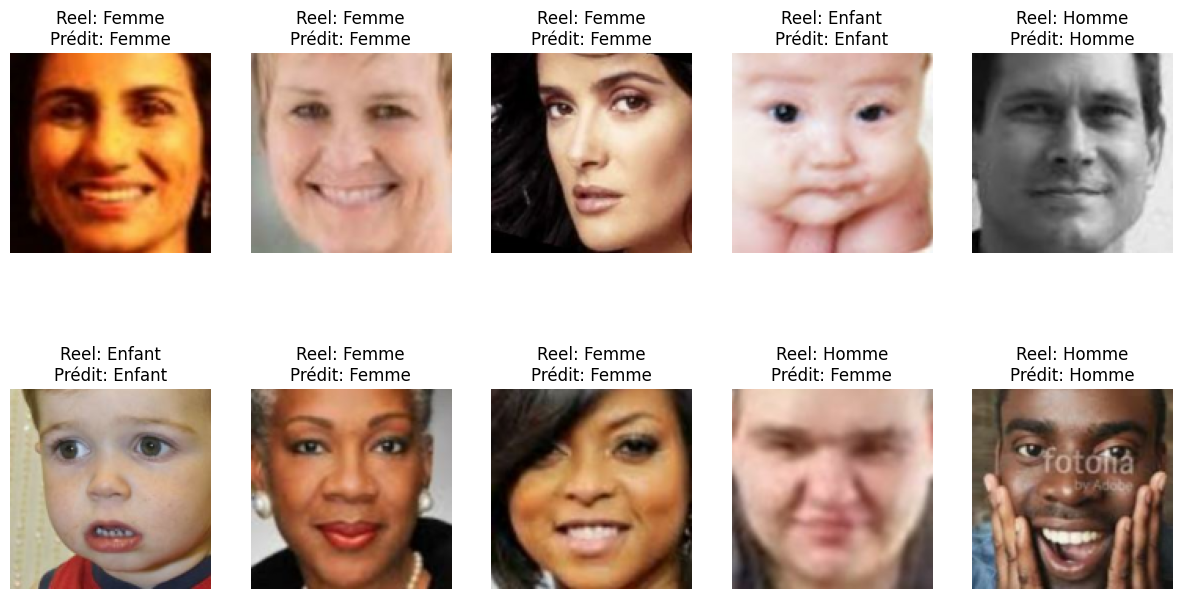

In [56]:
label_map = ["Homme", "Femme", "Enfant"]
plt.figure(figsize=(15, 8))
sample = random.sample(test_files, 10)

for i, fname in enumerate(sample):
    img, label = parse_image(fname)
    pred = model.predict(tf.expand_dims(img, 0), verbose=0)
    pred_class = tf.argmax(pred, axis=1).numpy()[0]
    true_class = tf.argmax(label).numpy()

    plt.subplot(2,5,i+1)
    plt.imshow(img)
    plt.title(f"Reel: {label_map[true_class]}\nPrédit: {label_map[pred_class]}")
    plt.axis("off")
plt.show()